In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import *

In [2]:
race = pd.read_csv("../../../output/data_clean/cleaned_race_equivalent_distance.csv", index_col= 0)
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)

In [3]:
join = pd.merge(runner, race, left_on="race_year_id", right_on="race_year_id", how="left")
join = join.loc[join.age_range != "Undefined"]
join = join.loc[join.speed < 20]
join = join.loc[join.distance > 150]
join_unique_per_year = join.drop_duplicates(subset=['runner_id','year'])
join_unique = join.drop_duplicates(subset=['runner_id'], keep='last')

In [27]:
top_country_race = race.loc[(race.country_code == "USA") | (race.country_code == "GBR") |
                            (race.country_code == "FRA") | (race.country_code == "SWE") |
                            (race.country_code == "AUS") | (race.country_code == "CHN") |
                            (race.country_code == "CAN") | (race.country_code == "ESP") |
                            (race.country_code == "JPN") | (race.country_code == "POL") ]

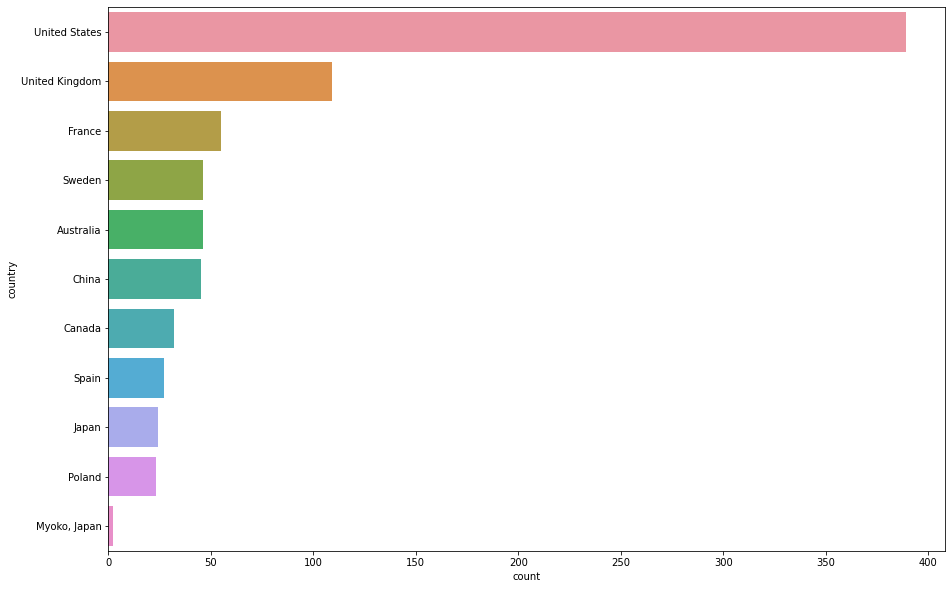

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(
    y = "country",
    data = top_country_race,
    order = top_country_race['country'].value_counts().index
)
plt.savefig('../../../output/countries.pdf')

In [5]:
top_country_race = race.loc[(race.country_code == "USA") | (race.country_code == "GBR") |
                            (race.country_code == "FRA") | (race.country_code == "SWE") |
                            (race.country_code == "AUS") | (race.country_code == "CHN") ]
top_country_race = top_country_race.loc[top_country_race.distance > 130]

In [6]:
month_type = pd.CategoricalDtype( 
    categories=[1,2,3,4,5,6,7,8,9,10,11,12],ordered=True
)
top_country_race.month = top_country_race.month.astype(month_type)

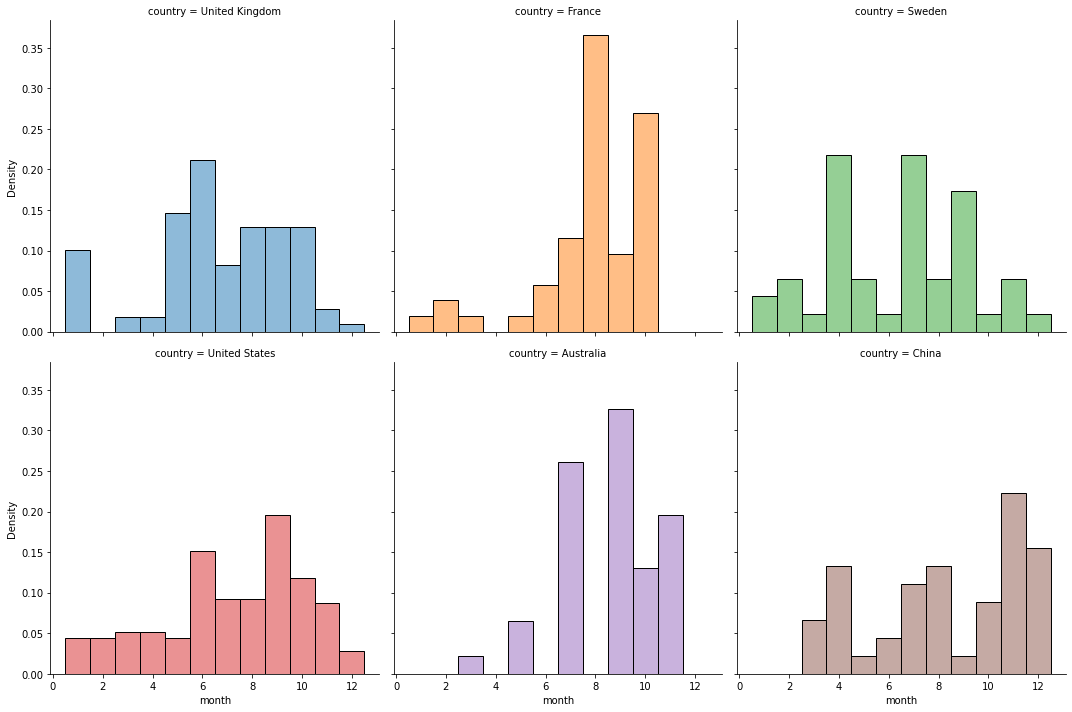

In [24]:
ax = sns.displot(x = top_country_race['month'], col=top_country_race['country'],col_wrap = 3,
                 hue=top_country_race['country'], stat = 'density', common_norm=False, legend=False)

plt.savefig('../../../output/course_profile_month.pdf')

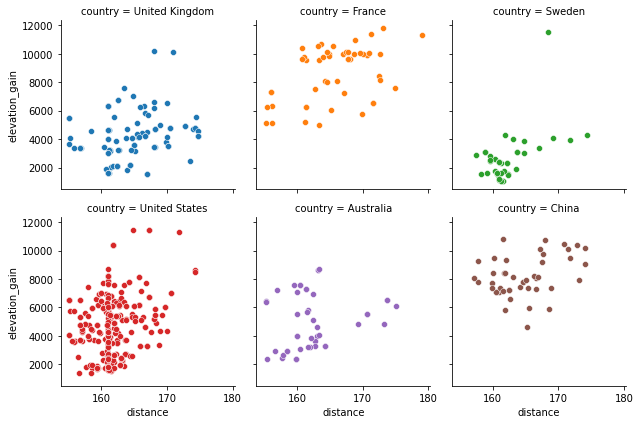

In [23]:
grid = sns.FacetGrid(top_country_race, col = "country", hue = "country", col_wrap=3)
grid.map(sns.scatterplot, "distance", "elevation_gain")

plt.savefig('../../../output/course_profile_distance.pdf')

<Figure size 864x720 with 0 Axes>

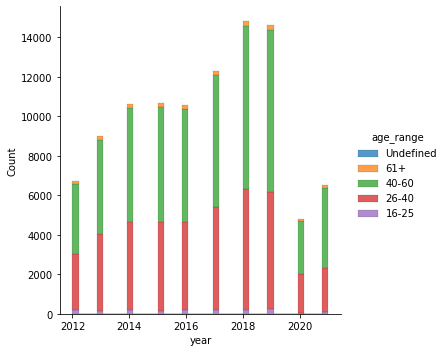

In [9]:
plt.figure(figsize=(12,10))

sns.displot(
    data=join_unique_per_year,
    x="year",
    hue="age_range",
    multiple="stack",
    linewidth=.1,
    hue_order = ['Undefined','61+','40-60','26-40','16-25'],
#     stat = 'density', 
    common_norm=False
)

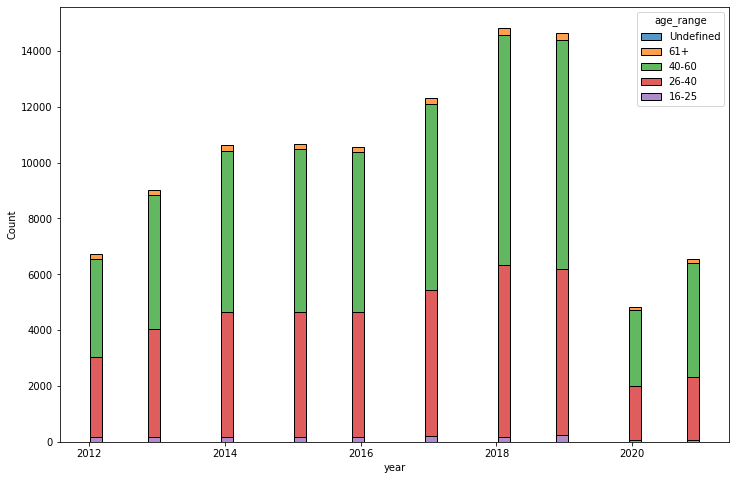

In [10]:
plt.figure(figsize=(12,8))

ax = sns.histplot(x = join_unique_per_year['year'], hue=join_unique_per_year['age_range'],multiple="stack", 
    hue_order = ['Undefined','61+','40-60','26-40','16-25'],
                  shrink = 0.8, common_norm=False)

plt.savefig('../../../output/age_over_time.pdf')

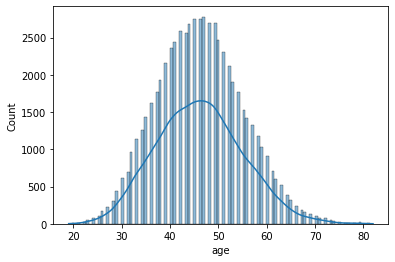

In [17]:
sns.histplot(x=join_unique.age,kde=True)
plt.savefig('../../../output/age_density.pdf')

<AxesSubplot:xlabel='age_course', ylabel='Count'>

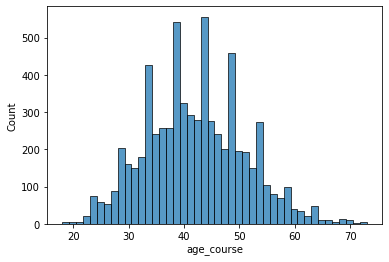

In [12]:
sns.histplot(x=join_unique.loc[join_unique.year == 2012].age_course)

<AxesSubplot:xlabel='age_course', ylabel='Count'>

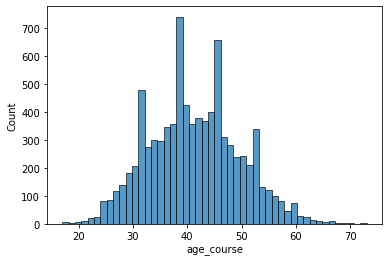

In [13]:
sns.histplot(x=join_unique.loc[join_unique.year == 2018].age_course)